In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point
import geopandas
plt.style.use(['dark_background', 'seaborn-v0_8-darkgrid'])
sns.set_theme(style='darkgrid')
#plt.style.use('fivethirtyeight')

## US Exploratory Data Analysis, Cleaning, and Processing

In [3]:
confirmed_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"
confirmed_df = pd.read_csv(confirmed_url)
deaths_df = pd.read_csv(deaths_url)
display(confirmed_df.head())
display(deaths_df.head())

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,230,232,232,232,232,232,232,232,232,232
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,724,726,726,726,726,726,726,726,727,727
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,103,103,103,103,103,103,103,103,103,103
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,109,109,109,109,109,109,109,109,109,109
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,261,261,261,261,261,261,261,261,261,261


In [4]:
def analyze_df(df, head_rows=5):
    print(f"1. First {head_rows} rows of data:\n")
    display(df.head())

    print(f"\n 2. Data Info:\n")
    display(df.info())

    print(f"\n 3. Description of Data:\n")
    display(df.describe().transpose())

    print(f" 4. Missing Values: \n")
    missing_values = df.isnull().sum()
    display(missing_values)

In [5]:
# handle missing values

# confirmed
c_null_columns = confirmed_df.isnull().any()
display(print(f'{c_null_columns[:15]}'))

# deaths
d_null_columns = deaths_df.isnull().any()
display(print(f'\n\n {d_null_columns[:15]}'))

confirmed_df.dropna()
deaths_df.dropna()

# FIPS (10 nans) and Admin2 (6 nans), well just drop them for now

UID               False
iso2              False
iso3              False
code3             False
FIPS               True
Admin2             True
Province_State    False
Country_Region    False
Lat               False
Long_             False
Combined_Key      False
1/22/20           False
1/23/20           False
1/24/20           False
1/25/20           False
dtype: bool


None



 UID               False
iso2              False
iso3              False
code3             False
FIPS               True
Admin2             True
Province_State    False
Country_Region    False
Lat               False
Long_             False
Combined_Key      False
Population        False
1/22/20           False
1/23/20           False
1/24/20           False
dtype: bool


None

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,230,232,232,232,232,232,232,232,232,232
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,724,726,726,726,726,726,726,726,727,727
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,103,103,103,103,103,103,103,103,103,103
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,109,109,109,109,109,109,109,109,109,109
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,261,261,261,261,261,261,261,261,261,261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,16,16,16,16,16,16,16,16,16,16
3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,43,43,43,43,43,43,43,43,43,43
3339,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,50,50,50,50,50,50,50,51,51,51


In [6]:
# massage dataframe so that date columns are now rows and create num of Cases and Date columns

id_vars_c = ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 
           'Country_Region', 'Lat', 'Long_', 'Combined_Key']	
df_c = confirmed_df.melt(id_vars=id_vars_c, var_name='Date', value_name='Cases')
#display(df_c.head())

id_vars_d = ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 
           'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population']
df_d = deaths_df.melt(id_vars=id_vars_d, var_name='Date', value_name='Deaths')
#display(df_d.head())

# merge confirmed cases and deaths cases into one dataframe

merged_df = pd.merge(df_c, df_d[['UID', 'Date', 'Population', 'Deaths']], on=['UID', 'Date'], how='outer')
merged_df.rename(columns={'Admin2': 'County'}, inplace=True)
merged_df.head()

,UID,iso2,iso3,code3,FIPS,County,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Cases,Population,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/1/21,0,55641,0
1,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/1/22,11,55641,0
2,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/1/23,8266,55641,34
3,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/10/21,0,55641,0
4,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/10/22,18,55641,0


In [7]:
# confirm we have no duplicates

duplicates = merged_df.duplicated().sum()
if duplicates:
    merged_df.drop_duplicates(inplace=True)
    print(f'{duplicates} duplicate rows dropped!')
else:
    print('OH YEAH NO DUPES')

OH YEAH NO DUPES


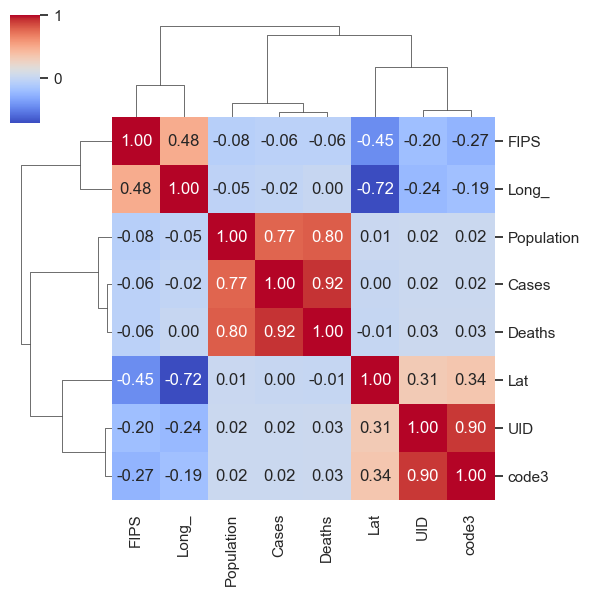

In [8]:
corr_matrix = merged_df.corr(numeric_only=True)
#plt.title('Clustermap Matrix')
sns.clustermap(corr_matrix,
              annot=True,
              fmt='.2f',
              figsize=(6,6),
              cmap='coolwarm')

# strong positive correlation between (cases and deaths), (Population and Cases), (deaths and population)! 

## Time Series Analysis

In [10]:
# change date column to datetime object
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%m/%d/%y', errors='coerce')

In [11]:
unique_places = merged_df['Province_State'].unique().tolist()
print(unique_places)

['American Samoa', 'Guam', 'Northern Mariana Islands', 'Virgin Islands', 'Puerto Rico', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'Diamond Princess', 'Grand Princess']


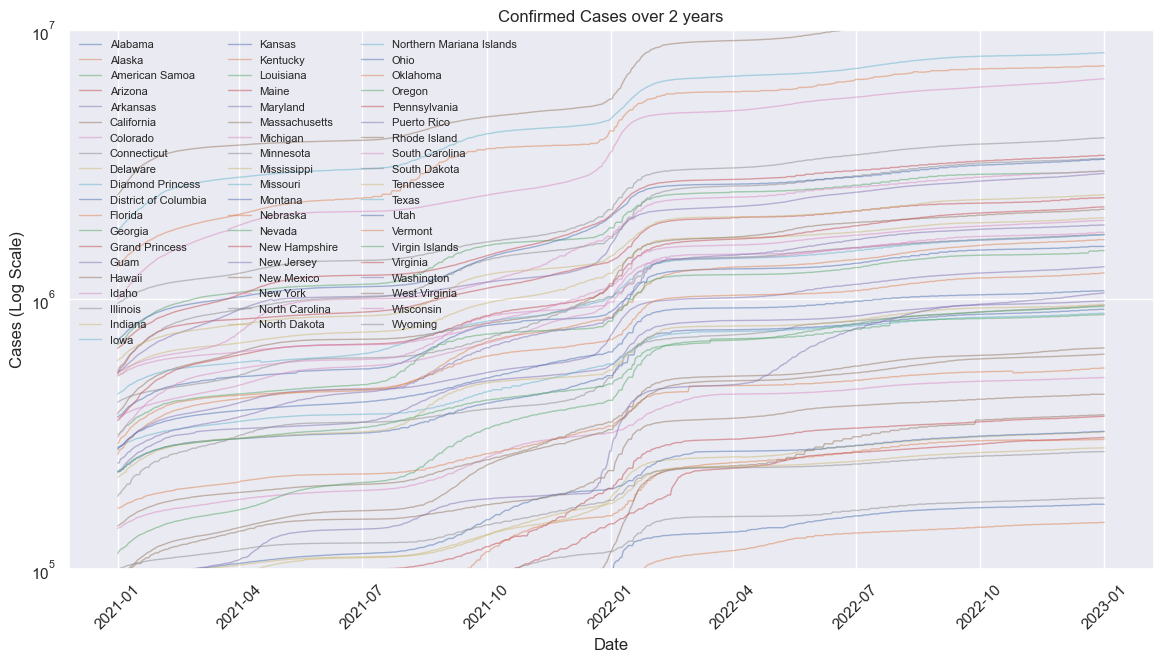

In [12]:
# select_locs = [ 'Connecticut']

# filter dataframe to plotcause she too big rn
filtered_df = merged_df[(merged_df['Date'] >= '2021-01-01') & 
                        (merged_df['Date'] <= '2023-01-01')] # (merged_df['Province_State'].isin(select_locs))

# aggregate cases by date (sum if multiple entries exist)
grouped_df = filtered_df.groupby(['Date', 'Province_State'], as_index=False).agg({'Cases': 'sum', 'Deaths': 'sum'})

categories = grouped_df['Province_State'].unique()
plt.figure(figsize=(14,7))

for category in categories:
    
    # filter df for specific location
    filt_df = grouped_df[grouped_df['Province_State'] == category]
    plt.plot(filt_df['Date'], filt_df['Cases'], alpha=0.5, linewidth=1, label=category)

plt.xlabel('Date')
plt.ylabel('Cases (Log Scale)')
plt.title('Confirmed Cases over 2 years')

plt.xticks(rotation=45)
plt.yscale('log')

# most of the locations are clustered around this area
plt.ylim(10**5, 10**7)

# avoid clutter
plt.legend(loc="upper left", fontsize=8, ncol=3, frameon=False)
plt.grid(True)
plt.show()

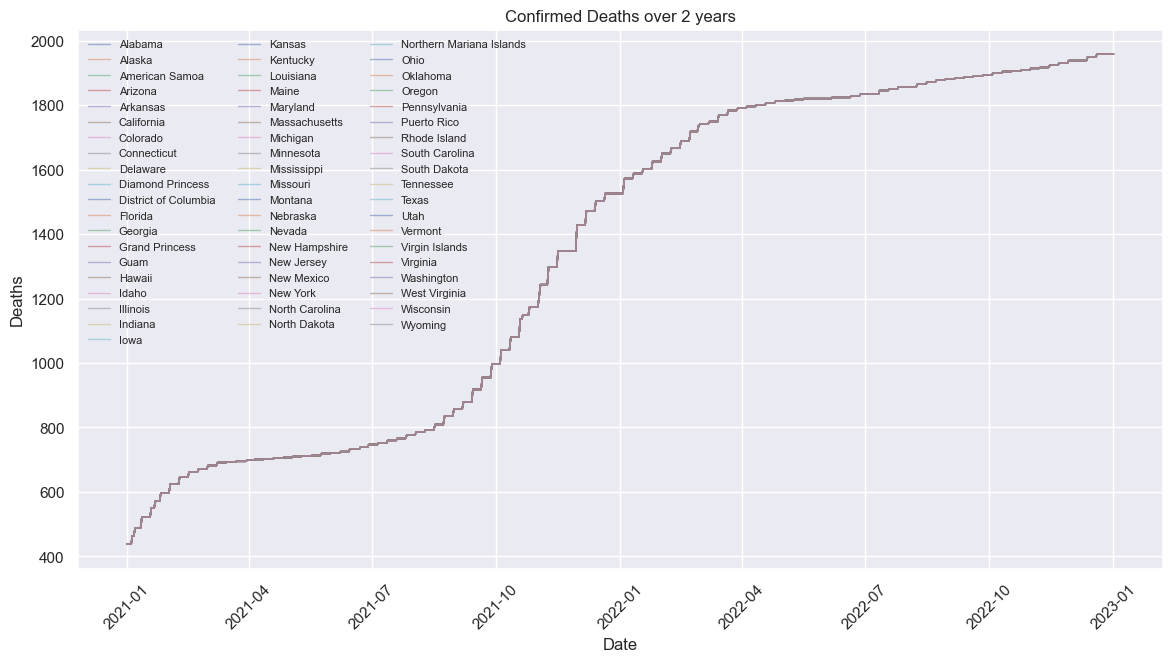

In [13]:
plt.figure(figsize=(14,7))

for category in categories:
    plt.plot(filt_df['Date'], filt_df['Deaths'], alpha=0.5, linewidth=1, label=category)

plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Confirmed Deaths over 2 years')

plt.xticks(rotation=45)
#plt.yscale('log')
#plt.ylim(1250, 1260)

# avoid clutter
plt.legend(loc="upper left", fontsize=8, ncol=3, frameon=False)
plt.grid(True)
plt.show()
#why dis acting like that

## Statistical Analysis

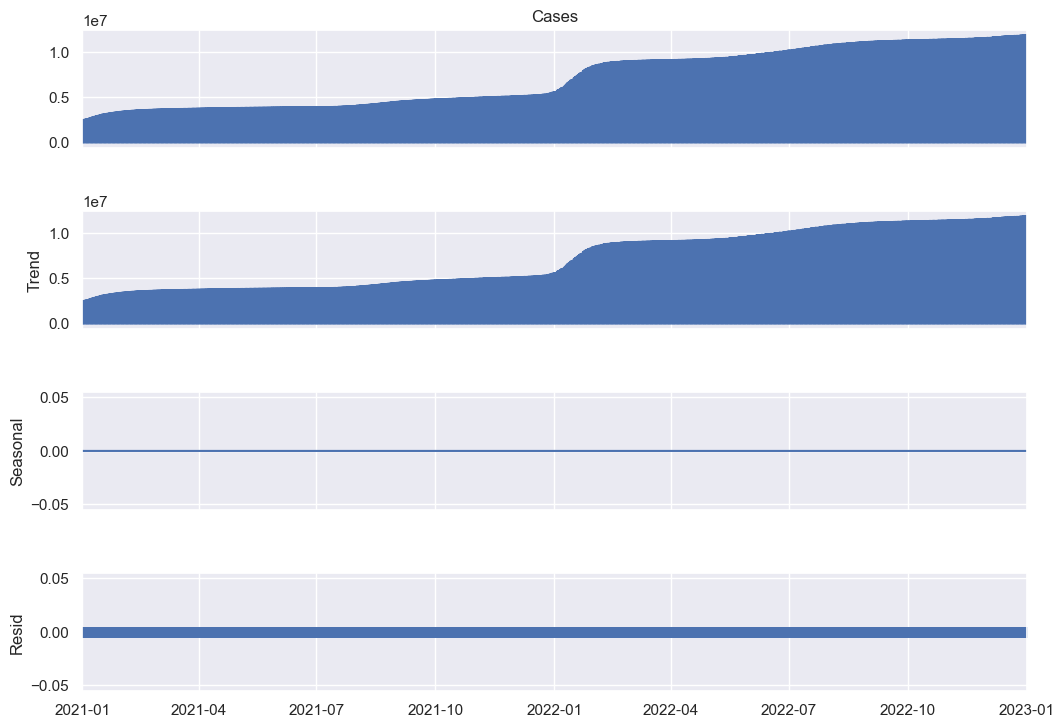

ADF Statistic for Cases: -6.868654150048658
p-value for Cases: 1.5357193873610826e-09

ADF Statistic for Deaths: -6.561616666491369
p-value for Deaths: 8.353807056561852e-09


In [15]:
grouped_df = grouped_df.set_index('Date')
decomposition = seasonal_decompose(grouped_df['Cases'], model='additive', period=1)  # annual seasonality

fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

# p < 0.05 suggests stationarity
c_res = adfuller(grouped_df['Cases']) # stationary 
print(f"ADF Statistic for Cases: {c_res[0]}")
print(f"p-value for Cases: {c_res[1]}")

d_res = adfuller(grouped_df['Deaths']) # stationary
print(f"\nADF Statistic for Deaths: {d_res[0]}")
print(f"p-value for Deaths: {d_res[1]}")  

# stationary means statistical properties remain constant overtime in the DF. (Mean, variance, autocorrelation structure)

In [16]:
# make date index and sort
merged_df.set_index('Date', inplace=True)
merged_df.sort_index(inplace=True)
analyze_df(merged_df, head_rows=5)

1. First 5 rows of data:



,UID,iso2,iso3,code3,FIPS,County,Province_State,Country_Region,Lat,Long_,Combined_Key,Cases,Population,Deaths
Date,,,,,,,,,,,,,,
2020-01-22,84040005,US,USA,840,40005.0,Atoka,Oklahoma,US,34.373666,-96.038025,"Atoka, Oklahoma, US",0,13758,0
2020-01-22,84004009,US,USA,840,4009.0,Graham,Arizona,US,32.931669,-109.888218,"Graham, Arizona, US",0,38837,0
2020-01-22,84046065,US,USA,840,46065.0,Hughes,South Dakota,US,44.390915,-99.996611,"Hughes, South Dakota, US",0,17526,0
2020-01-22,84038085,US,USA,840,38085.0,Sioux,North Dakota,US,46.113233,-101.044015,"Sioux, North Dakota, US",0,4230,0
2020-01-22,84006063,US,USA,840,6063.0,Plumas,California,US,40.003560,-120.839524,"Plumas, California, US",0,18807,0



 2. Data Info:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3819906 entries, 2020-01-22 to 2023-03-09
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   UID             int64  
 1   iso2            object 
 2   iso3            object 
 3   code3           int64  
 4   FIPS            float64
 5   County          object 
 6   Province_State  object 
 7   Country_Region  object 
 8   Lat             float64
 9   Long_           float64
 10  Combined_Key    object 
 11  Cases           int64  
 12  Population      int64  
 13  Deaths          int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 437.2+ MB


None


 3. Description of Data:



,count,mean,std,min,25%,50%,75%,max
UID,3819906.0,8.342992e+07,4.313431e+06,16.0000,8.401810e+07,8.402921e+07,8.404612e+07,8.410000e+07
code3,3819906.0,8.344949e+02,3.648192e+01,16.0000,8.400000e+02,8.400000e+02,8.400000e+02,8.500000e+02
FIPS,3808476.0,3.304308e+04,1.864601e+04,60.0000,1.907650e+04,3.101200e+04,4.712950e+04,9.999900e+04
Lat,3819906.0,3.672162e+01,9.077965e+00,-14.2710,3.389666e+01,3.800561e+01,4.158072e+01,6.931479e+01
Long_,3819906.0,-8.864205e+01,2.177303e+01,-174.1596,-9.780501e+01,-8.948886e+01,-8.231237e+01,1.456739e+02
Cases,3819906.0,1.408761e+04,6.314543e+04,-3073.0000,3.300000e+02,2.272000e+03,8.159000e+03,3.710586e+06
Population,3819906.0,9.960357e+04,3.241176e+05,0.0000,9.917000e+03,2.489150e+04,6.497900e+04,1.003911e+07
Deaths,3819906.0,1.868829e+02,7.727570e+02,-82.0000,4.000000e+00,3.700000e+01,1.220000e+02,3.554500e+04


 4. Missing Values: 



UID                   0
iso2                  0
iso3                  0
code3                 0
FIPS              11430
County             6858
Province_State        0
Country_Region        0
Lat                   0
Long_                 0
Combined_Key          0
Cases                 0
Population            0
Deaths                0
dtype: int64

## Feature Engineering and Distributions and Clustering

In [18]:
# prep data for pca (just use relevant columns for now)
to_drop = ['iso2', 'iso3', 'Combined_Key', 'Country_Region', 'code3', 'UID', 'FIPS', 'County']
pca_df = merged_df.drop(columns=to_drop)
#pca_df.head()

In [19]:
display(merged_df.isnull().sum())
merged_df.drop(columns=['FIPS', 'County'], inplace=True)
display(merged_df.head())

UID                   0
iso2                  0
iso3                  0
code3                 0
FIPS              11430
County             6858
Province_State        0
Country_Region        0
Lat                   0
Long_                 0
Combined_Key          0
Cases                 0
Population            0
Deaths                0
dtype: int64

,UID,iso2,iso3,code3,Province_State,Country_Region,Lat,Long_,Combined_Key,Cases,Population,Deaths
Date,,,,,,,,,,,,
2020-01-22,84040005,US,USA,840,Oklahoma,US,34.373666,-96.038025,"Atoka, Oklahoma, US",0,13758,0
2020-01-22,84004009,US,USA,840,Arizona,US,32.931669,-109.888218,"Graham, Arizona, US",0,38837,0
2020-01-22,84046065,US,USA,840,South Dakota,US,44.390915,-99.996611,"Hughes, South Dakota, US",0,17526,0
2020-01-22,84038085,US,USA,840,North Dakota,US,46.113233,-101.044015,"Sioux, North Dakota, US",0,4230,0
2020-01-22,84006063,US,USA,840,California,US,40.003560,-120.839524,"Plumas, California, US",0,18807,0


In [20]:
# label encode categorical variables 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

pca_df['Province_State'] = le.fit_transform(pca_df['Province_State'])
pca_df.head()
# for column in ['Province_State', 'Country_Region']:
#     pca_df[column] = le.fit_transform(pca_df[column])

,Province_State,Lat,Long_,Cases,Population,Deaths
Date,,,,,,
2020-01-22,41,34.373666,-96.038025,0,13758,0
2020-01-22,3,32.931669,-109.888218,0,38837,0
2020-01-22,47,44.390915,-99.996611,0,17526,0
2020-01-22,38,46.113233,-101.044015,0,4230,0
2020-01-22,5,40.003560,-120.839524,0,18807,0


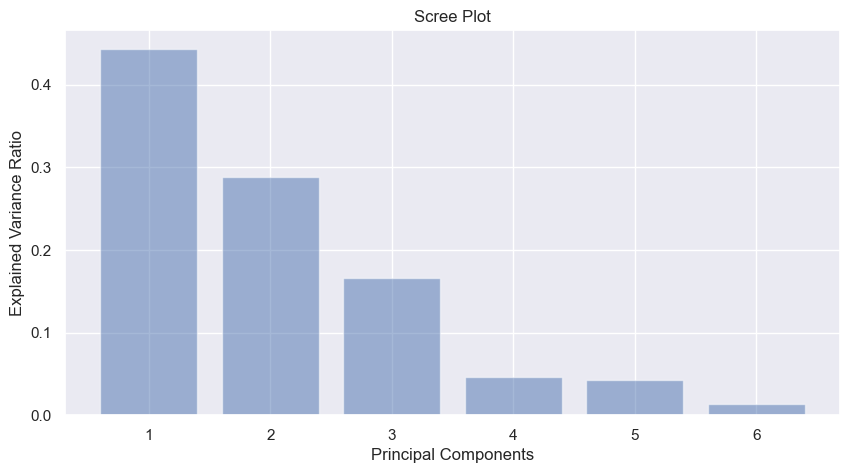

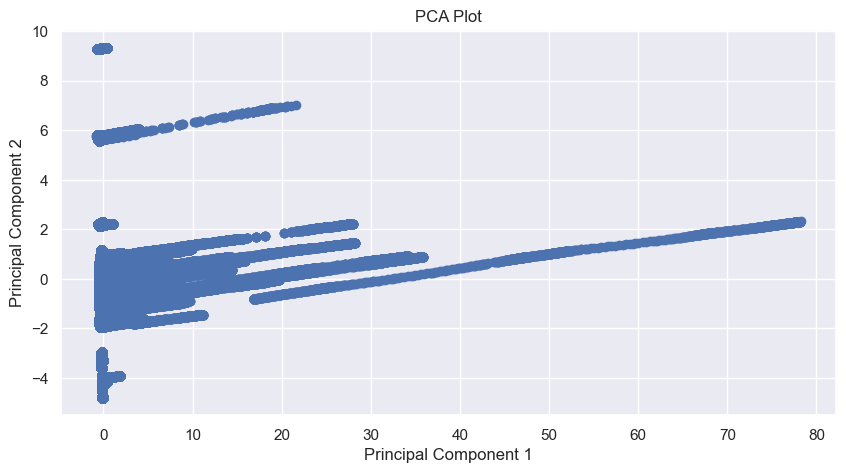

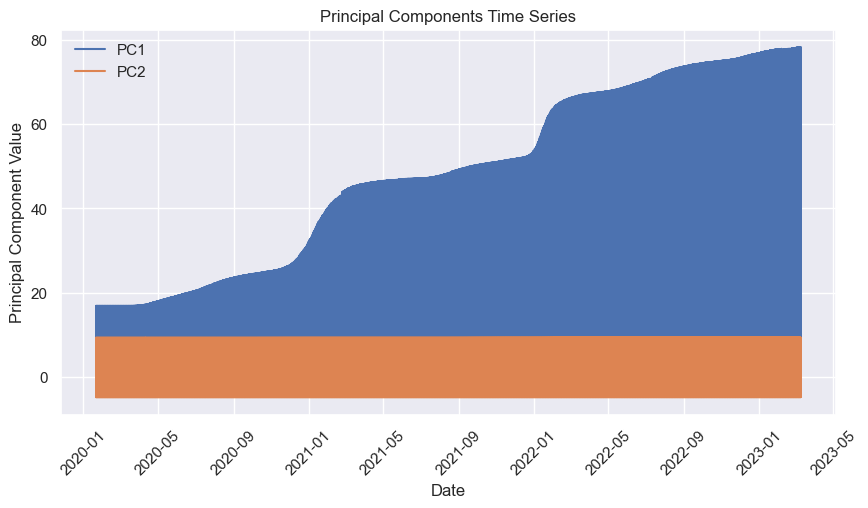

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# standardize data 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_df)

pca = PCA()
pca.fit(scaled_data)

explained_variance = pca.explained_variance_ratio_

# plot explained variance
plt.figure(figsize=(10,5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

# project data on Principal Components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'], index=pca_df.index)

# scatter plot of PCs
plt.figure(figsize=(10,5))
plt.scatter(principal_df['PC1'], principal_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.show()

# plot PCs as time series
plt.figure(figsize=(10,5))
plt.plot(principal_df.index, principal_df['PC1'], label='PC1')
plt.plot(principal_df.index, principal_df['PC2'], label='PC2')
plt.xlabel('Date')
plt.ylabel('Principal Component Value')
plt.title('Principal Components Time Series')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## Kmeans and DBSCAN Clustering

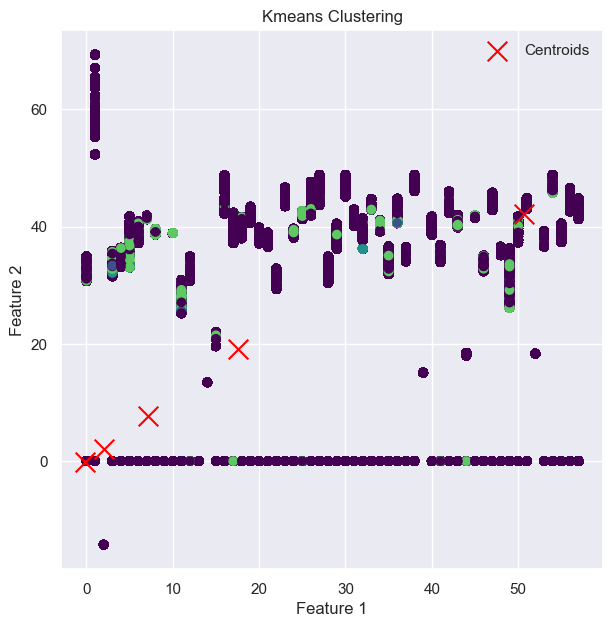

In [23]:
from sklearn.cluster import KMeans

#pca_df['Deaths_log'] = np.log1p(pca_df['Deaths'])  # log(Deaths + 1) to handle zeros

scaler = StandardScaler()
scaled_kmeans_data = scaler.fit_transform(pca_df[['Cases', 'Deaths']])
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_kmeans_data)


labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.figure(figsize=(7,7))
# plot data points (color cordinated by cluster)
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], c=labels, cmap='viridis')

# plot centroids
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=200, c='red', label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Kmeans Clustering')

plt.legend()
plt.show()

## GeoSpatial Analysis

In [25]:
# plotting geospatial stuffy

# create geometry (coordinate) column and turn df into gdf

# create copy 
geo_merged_df = merged_df.copy()

if 'latitutde' not in geo_merged_df.columns and 'longitude' not in geo_merged_df.columns:
    geo_merged_df.rename({'Lat': 'latitude', 'Long_': 'longitude'}, axis='columns', inplace=True)

geo_merged_df['geometry'] = geo_merged_df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
gdf = geopandas.GeoDataFrame(geo_merged_df, geometry='geometry', crs="EPSG:4326")

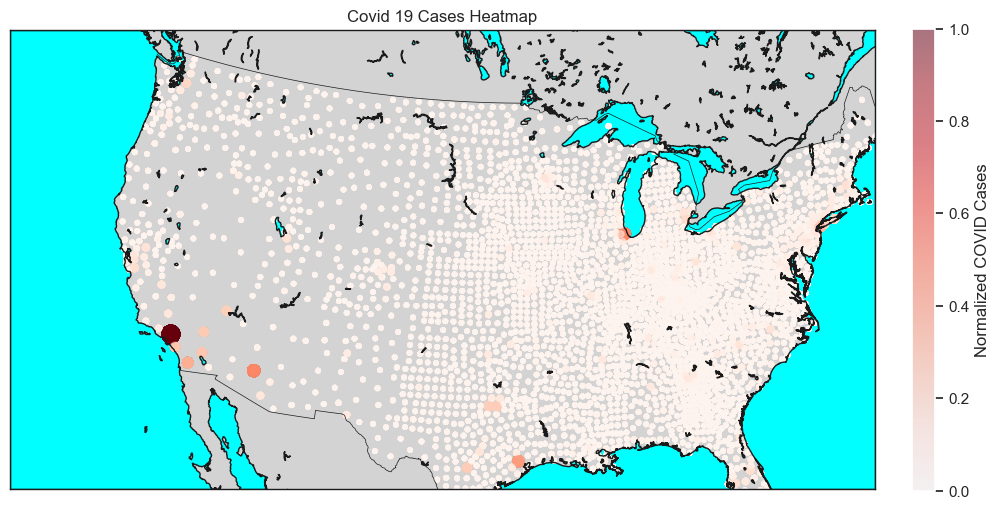

In [26]:
# USA heatmap plot 

lons = gdf['longitude'].values
lats = gdf['latitude'].values
cases = gdf['Cases'].values

# normalize case numbers for better visualizations
cases_scaled = (cases - cases.min()) / (cases.max() - cases.min())

fig, ax = plt.subplots(figsize=(12,6))
m = Basemap(projection='lcc', resolution='i', 
            lat_0=37.5, lon_0=-95,  # Centered on USA
            llcrnrlon=-125, llcrnrlat=24,  # Lower-left corner
            urcrnrlon=-66, urcrnrlat=50,  # Upper-right corner
            ax=ax)

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgray', lake_color='aqua')

# convert lat and lon into map coordinates
x, y = m(lons, lats)

# heatmap (scatter plot with alpha blending)
sc = ax.scatter(x, y, c=cases_scaled, cmap='Reds', alpha=0.5, s=cases_scaled * 150 + 10)

# color bar
cbar = plt.colorbar(sc, orientation='vertical', fraction=0.03, pad=0.04)
cbar.set_label("Normalized COVID Cases")

plt.title('Covid 19 Cases Heatmap')
plt.show()